In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
foo = pd.read_csv('bank-additional-full.csv', sep=';', nrows = 20000)
foo.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
num_records = len(foo)
print(num_records)

20000


In [4]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             20000 non-null  int64  
 1   job             20000 non-null  object 
 2   marital         20000 non-null  object 
 3   education       20000 non-null  object 
 4   default         20000 non-null  object 
 5   housing         20000 non-null  object 
 6   loan            20000 non-null  object 
 7   contact         20000 non-null  object 
 8   month           20000 non-null  object 
 9   day_of_week     20000 non-null  object 
 10  duration        20000 non-null  int64  
 11  campaign        20000 non-null  int64  
 12  pdays           20000 non-null  int64  
 13  previous        20000 non-null  int64  
 14  poutcome        20000 non-null  object 
 15  emp.var.rate    20000 non-null  float64
 16  cons.price.idx  20000 non-null  float64
 17  cons.conf.idx   20000 non-null 

In [5]:
foo.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
int_column = foo.dtypes[foo.dtypes == 'int64'].index | foo.dtypes[foo.dtypes == 'float64'].index

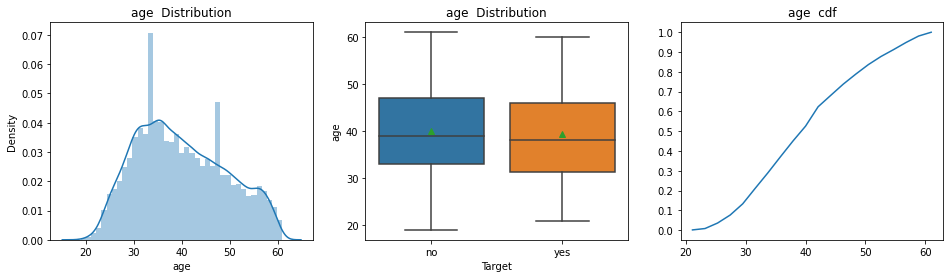

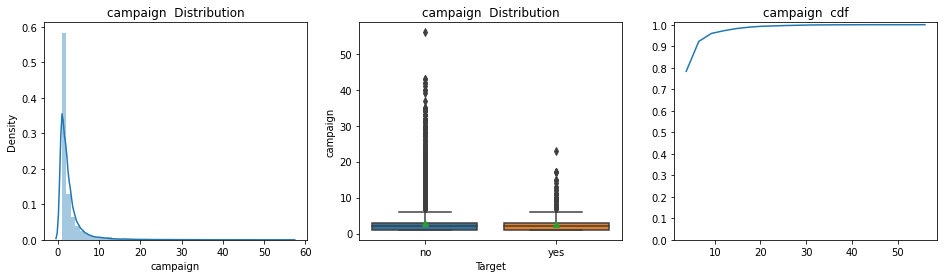

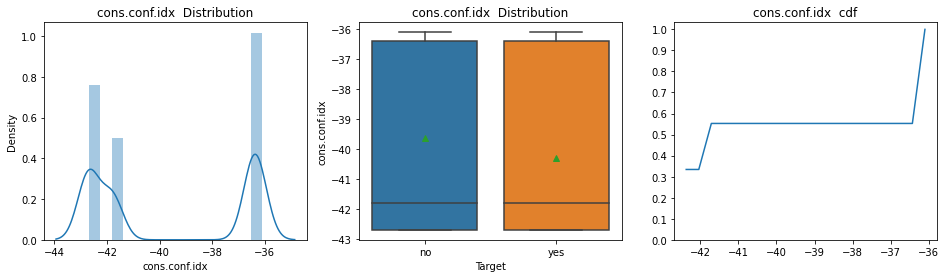

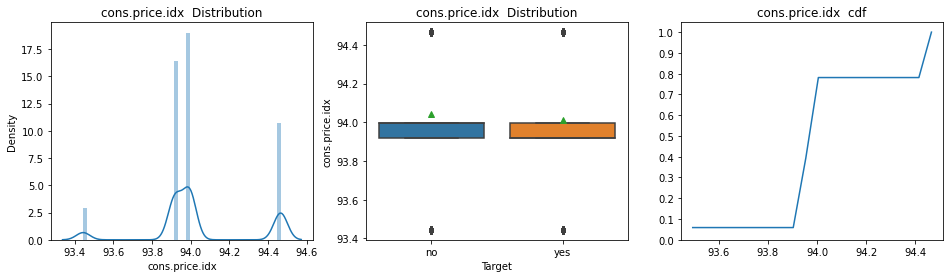

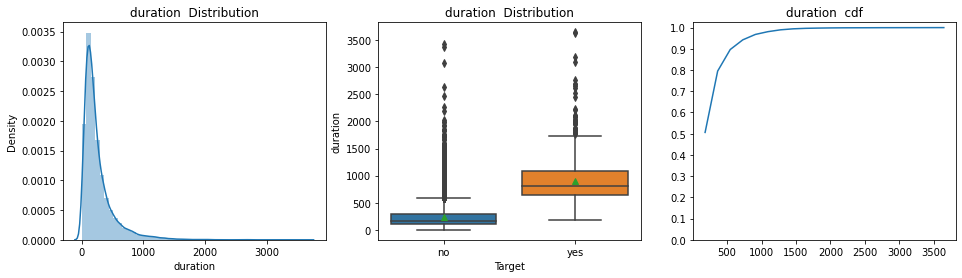

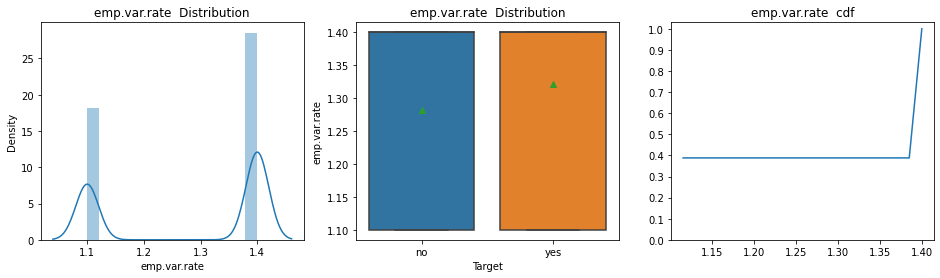

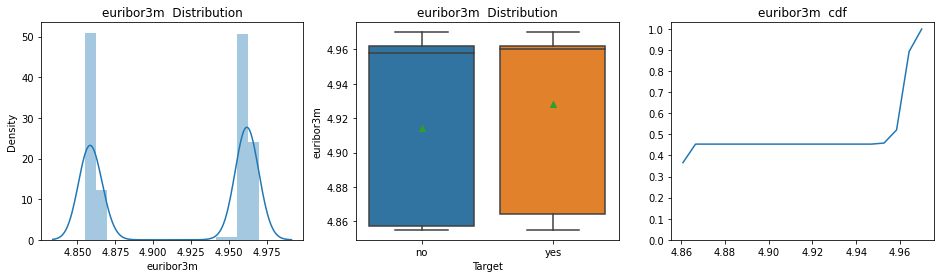

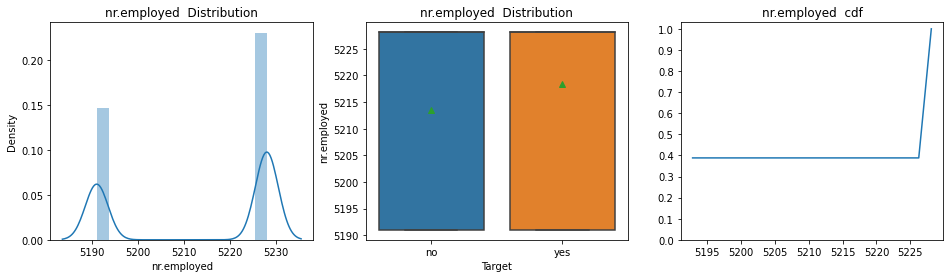

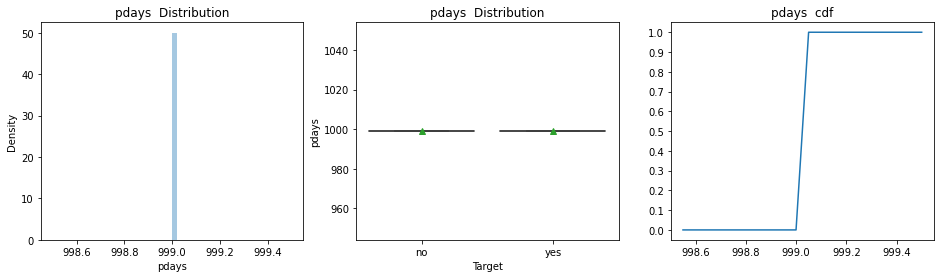

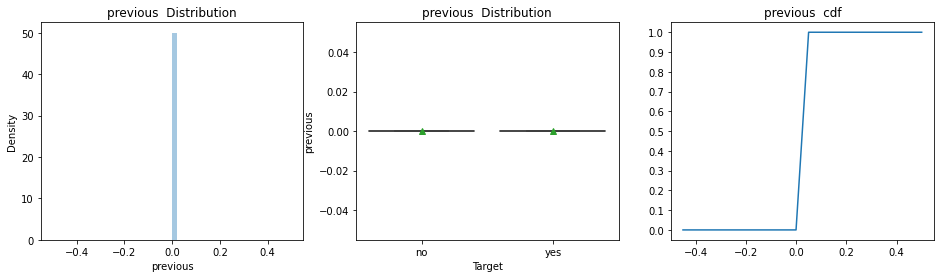

In [7]:
for column in int_column:    
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(foo[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=column, data = foo, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(foo[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{column}  cdf')
    plt.show()
    print()

In [8]:
for column in int_column:
    print(f'For {column}:')

    print('Min:', foo[column].quantile(q = 0))
    print('1º Quartile:', foo[column].quantile(q = 0.25))
    print('2º Quartile:', foo[column].quantile(q = 0.50))
    print('3º Quartile:', foo[column].quantile(q = 0.75))
    print('Max:', foo[column].quantile(q = 1.00),'\n')

For age:
Min: 19.0
1º Quartile: 32.0
2º Quartile: 39.0
3º Quartile: 47.0
Max: 61.0 

For campaign:
Min: 1.0
1º Quartile: 1.0
2º Quartile: 2.0
3º Quartile: 3.0
Max: 56.0 

For cons.conf.idx:
Min: -42.7
1º Quartile: -42.7
2º Quartile: -41.8
3º Quartile: -36.4
Max: -36.1 

For cons.price.idx:
Min: 93.444
1º Quartile: 93.918
2º Quartile: 93.994
3º Quartile: 93.994
Max: 94.465 

For duration:
Min: 0.0
1º Quartile: 104.0
2º Quartile: 180.0
3º Quartile: 320.0
Max: 3643.0 

For emp.var.rate:
Min: 1.1
1º Quartile: 1.1
2º Quartile: 1.4
3º Quartile: 1.4
Max: 1.4 

For euribor3m:
Min: 4.855
1º Quartile: 4.858
2º Quartile: 4.958
3º Quartile: 4.962
Max: 4.97 

For nr.employed:
Min: 5191.0
1º Quartile: 5191.0
2º Quartile: 5228.1
3º Quartile: 5228.1
Max: 5228.1 

For pdays:
Min: 999.0
1º Quartile: 999.0
2º Quartile: 999.0
3º Quartile: 999.0
Max: 999.0 

For previous:
Min: 0.0
1º Quartile: 0.0
2º Quartile: 0.0
3º Quartile: 0.0
Max: 0.0 



In [9]:
foo.drop(foo[foo.age>60].index, inplace=True)
foo.drop(foo[foo.campaign>10].index, inplace=True)
foo.drop(foo[foo.duration>1000].index, inplace=True)
foo.drop('pdays', axis=1, inplace=True)

In [10]:
dfgrouped = foo.groupby('y')

In [11]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    #plt.show()
    return plt

In [12]:
def feature_perc(feature,groupby= 'yes'):

    count = dfgrouped.get_group(groupby)[feature].value_counts()
    total_count = foo[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc

In [13]:
obj_column = foo.dtypes[foo.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

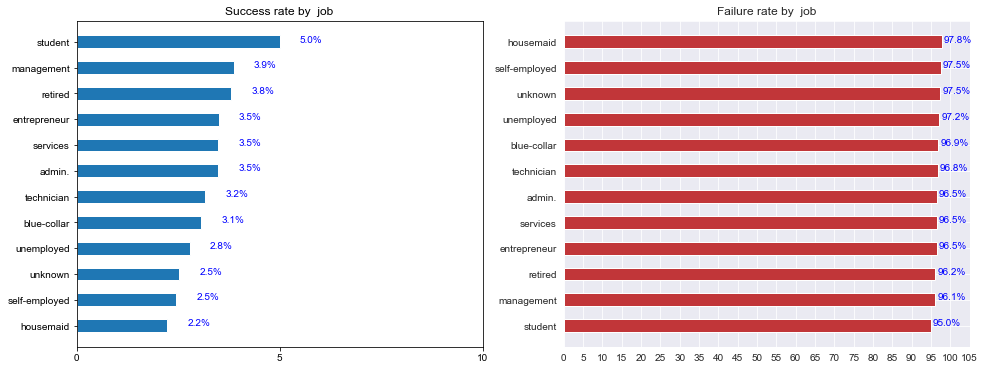

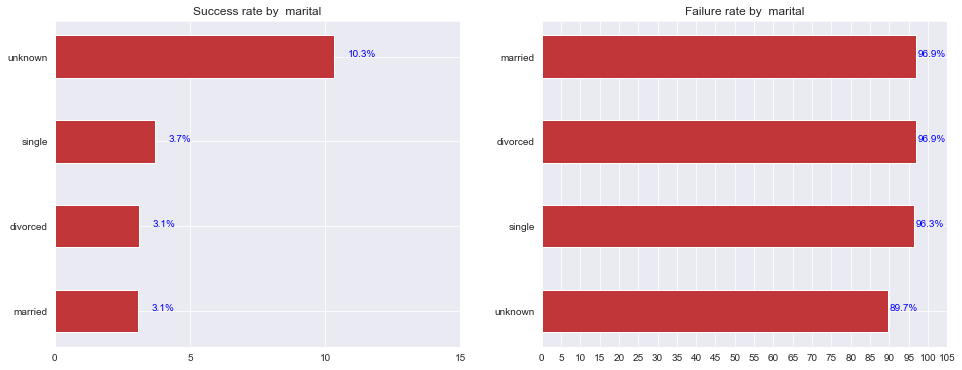

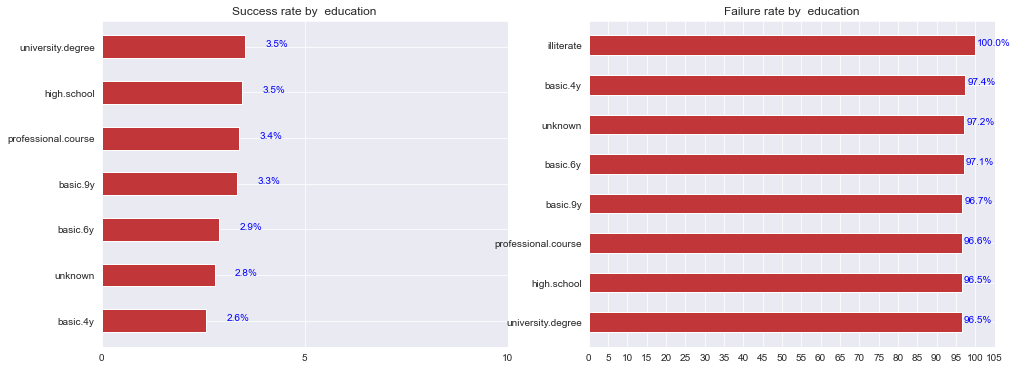

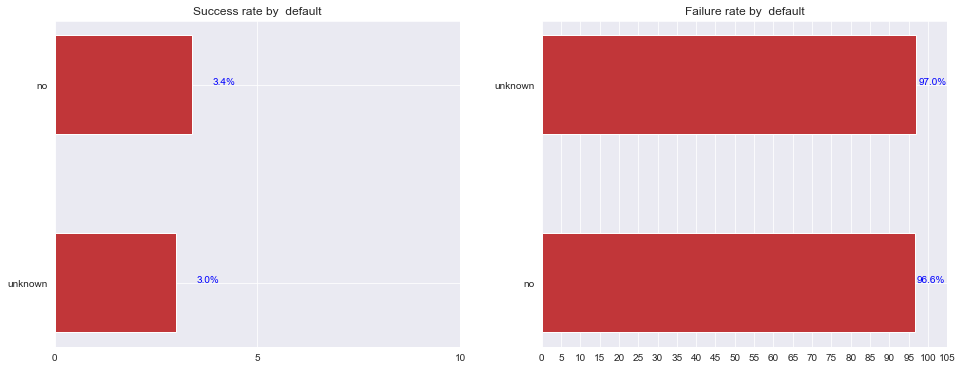

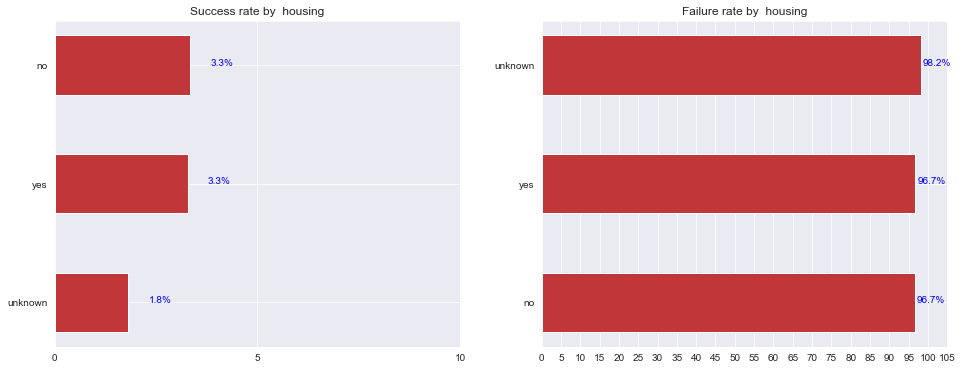

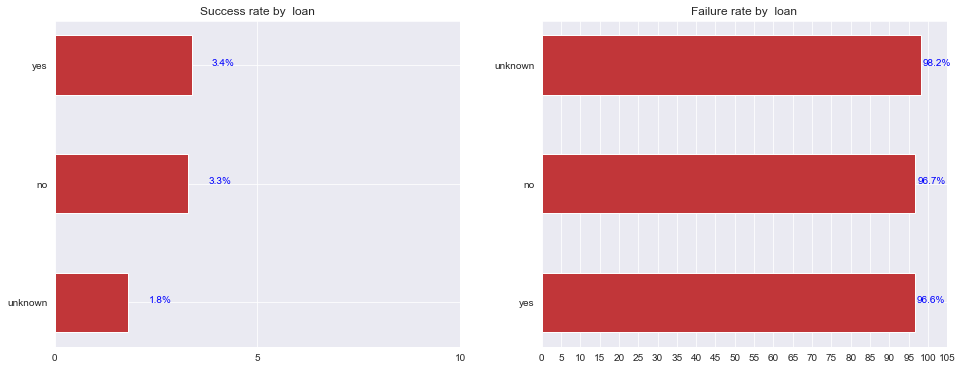

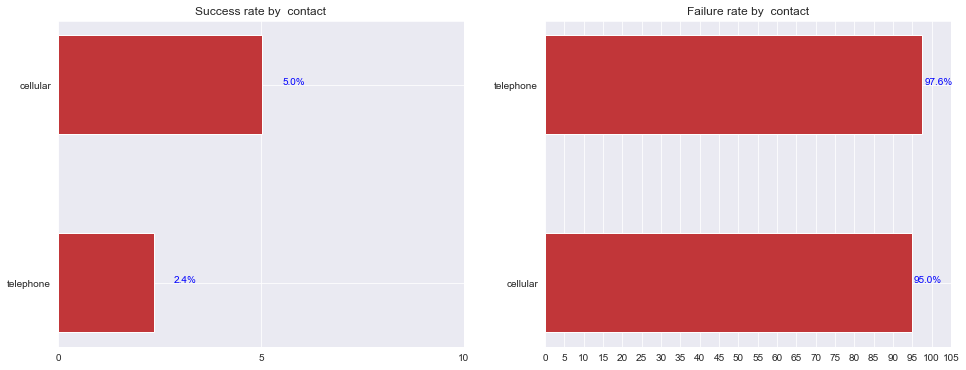

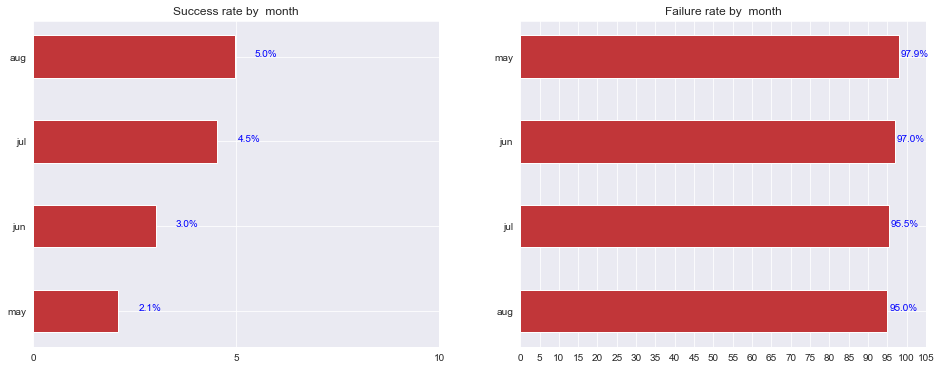

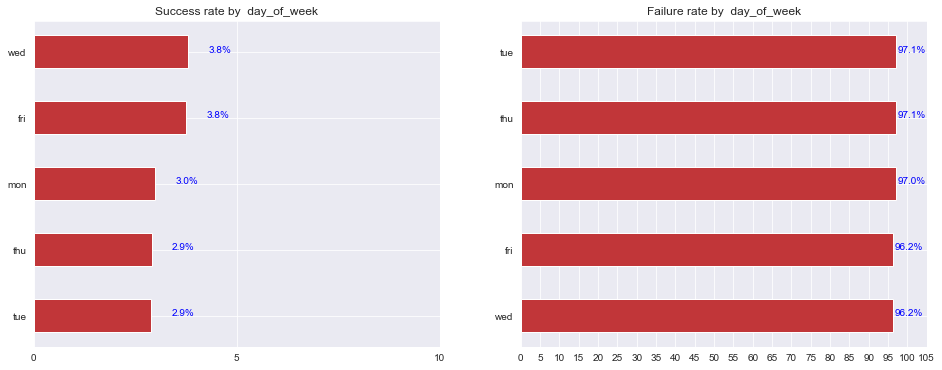

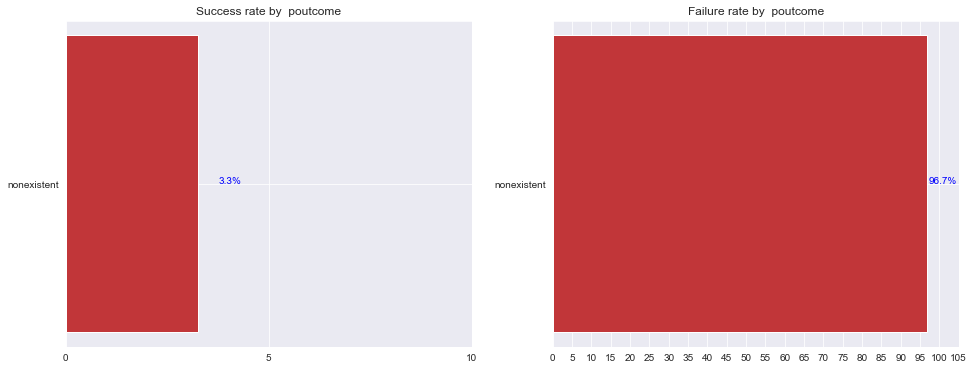

In [14]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()

In [15]:
obj_column = foo.dtypes[foo.dtypes == 'object'].index
mapingdf = pd.DataFrame()

for column in obj_column:
    labelencoder = LabelEncoder()
    foo[column] = labelencoder.fit_transform(foo[column])
    mapingdf[column] = foo[column]
    mapingdf['_'+column] =  labelencoder.inverse_transform(foo[column])

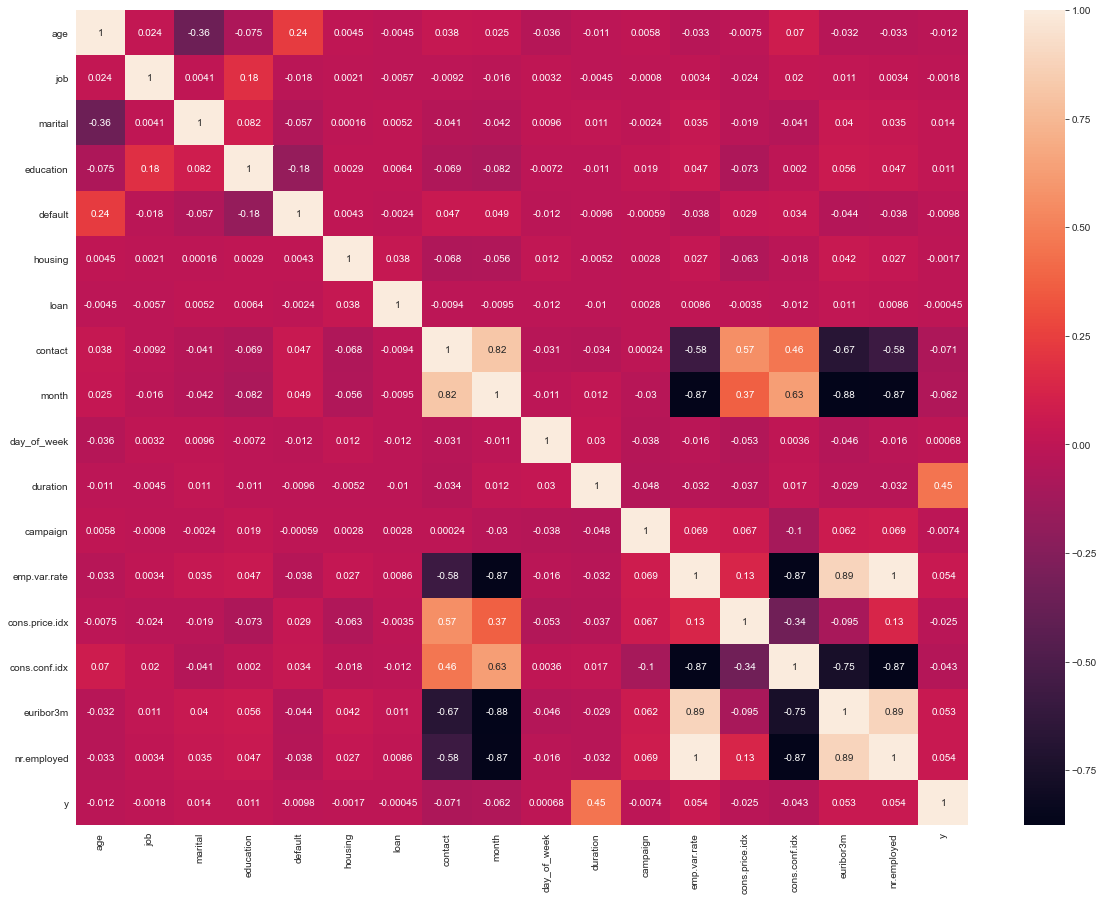

In [16]:
foo.drop('previous', axis=1, inplace=True)
foo.drop('poutcome', axis=1, inplace=True)
plt.figure(figsize=(20,15))
sns.heatmap(foo.corr(), annot=True)
plt.show()

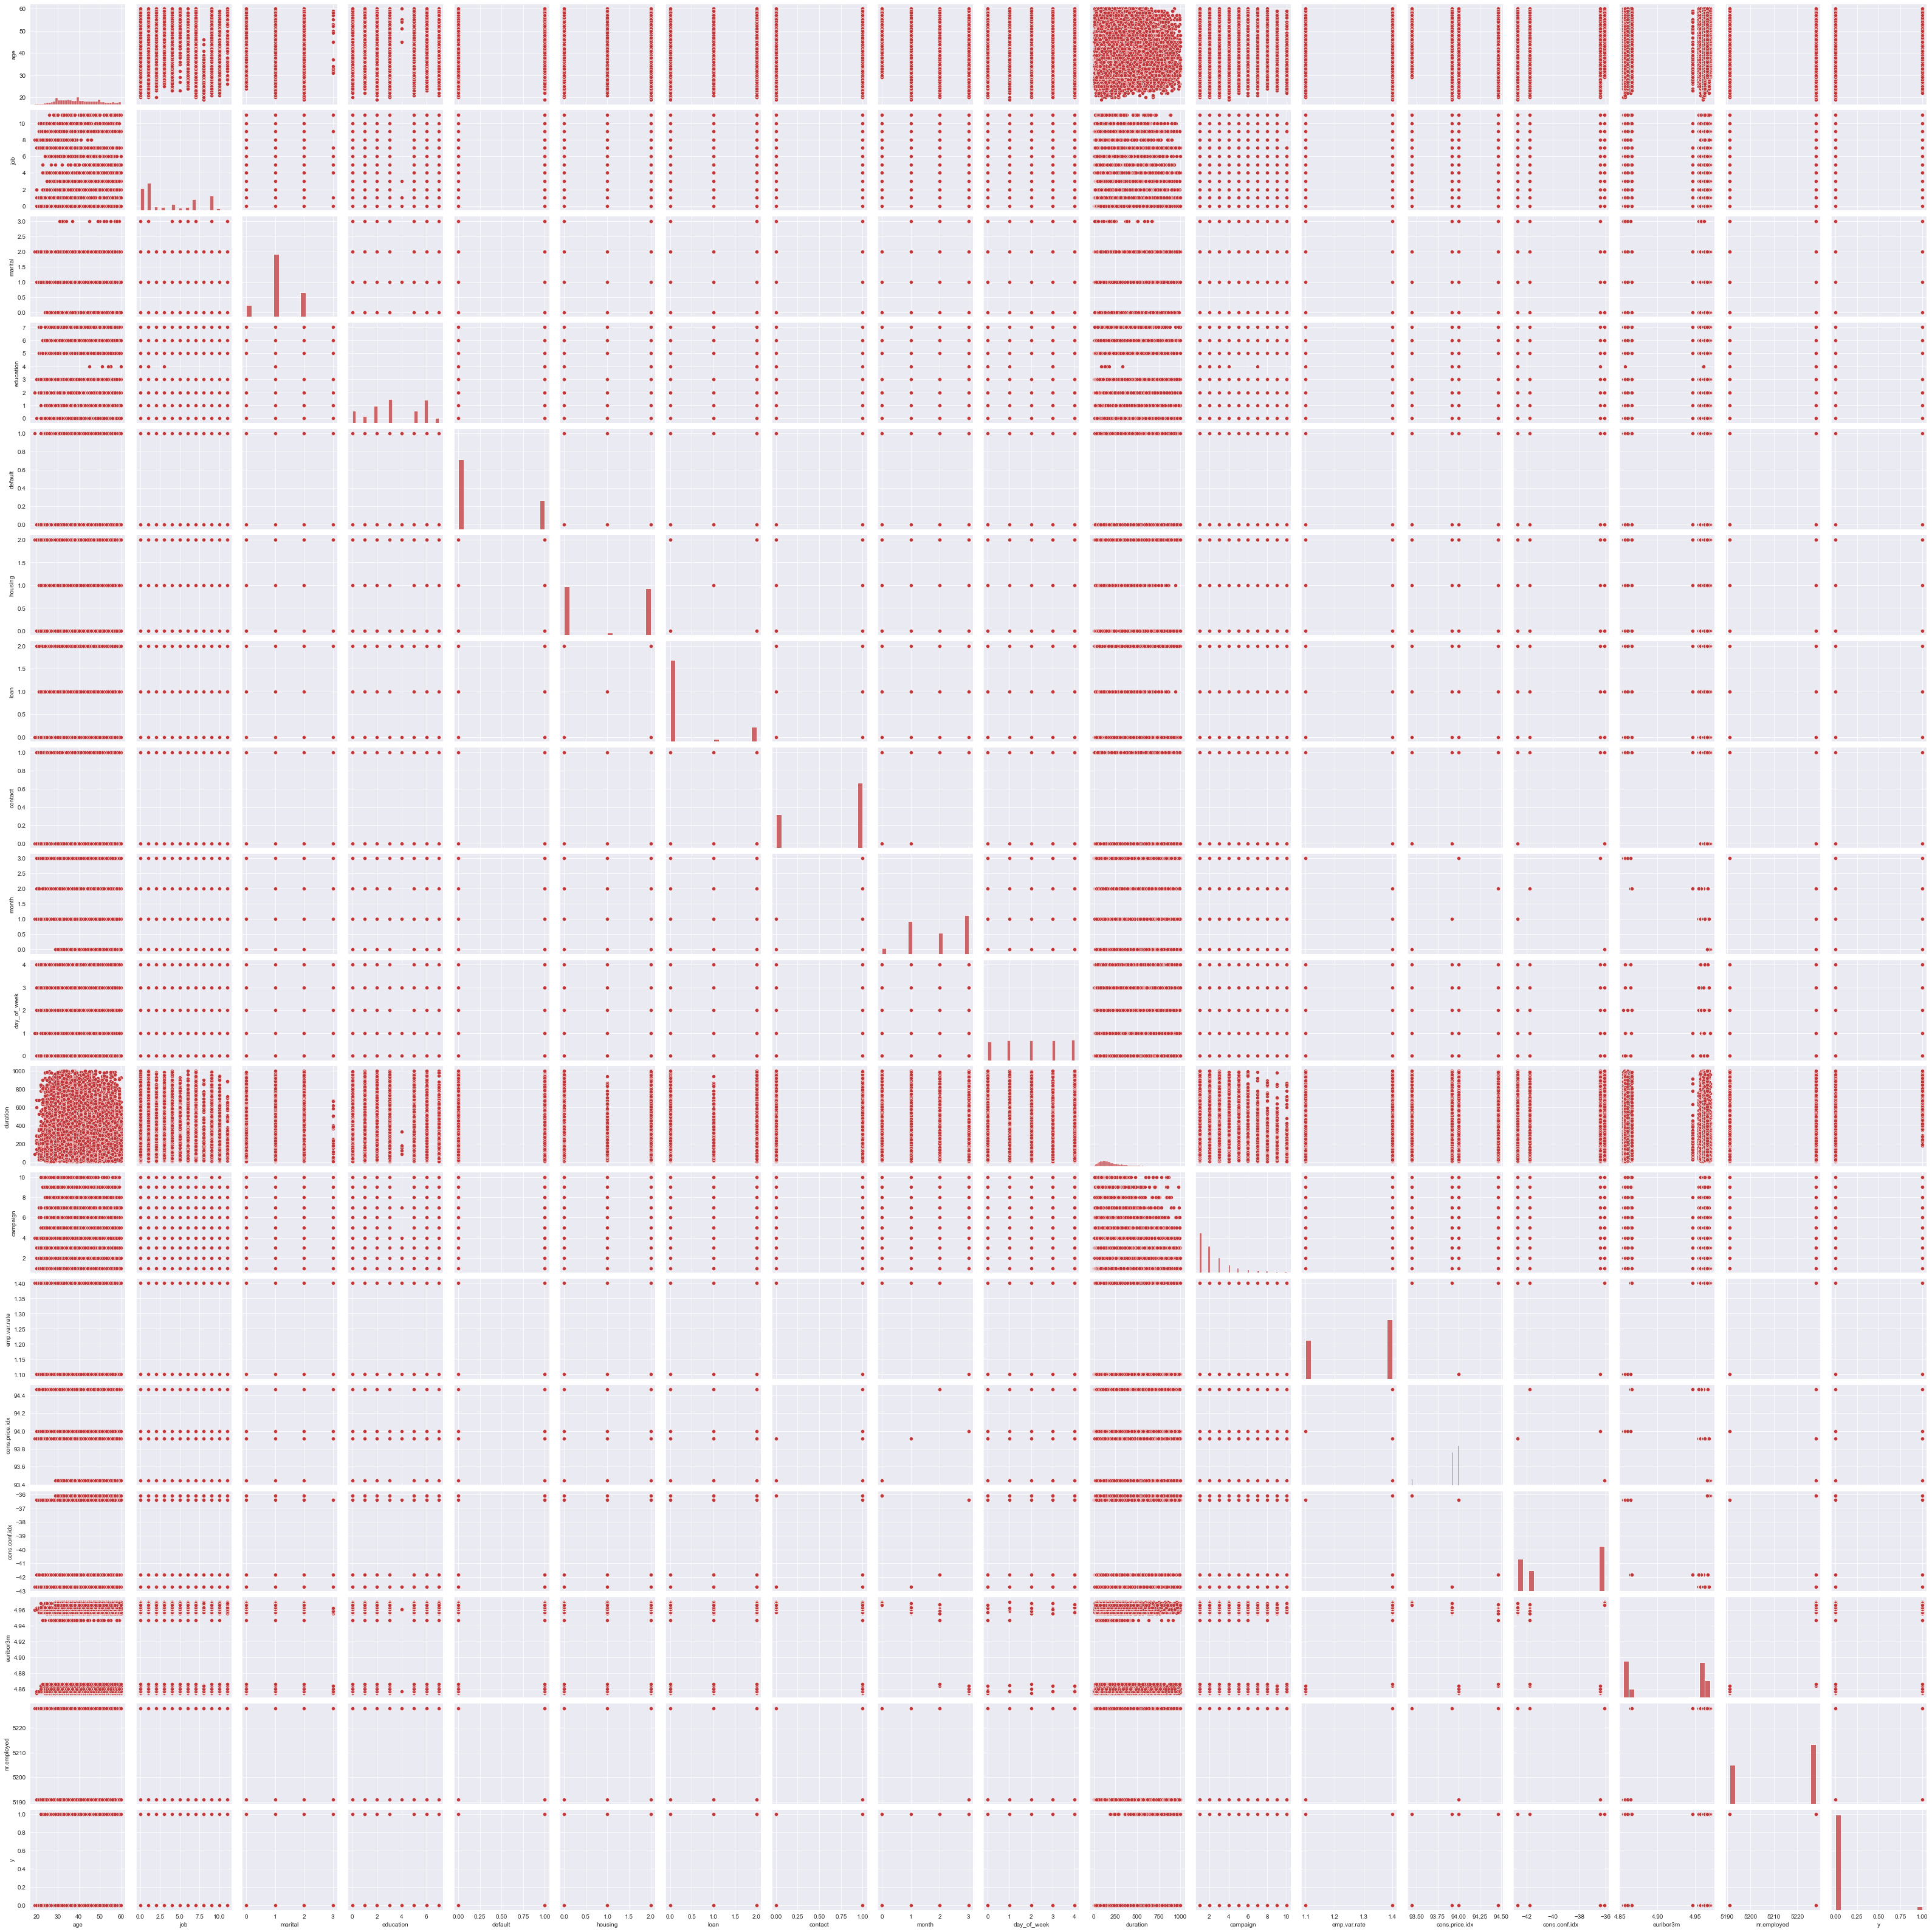

In [17]:
sns.pairplot(data=foo)

In [18]:
le = LabelEncoder()
foo['job']      = le.fit_transform(foo['job']) 
foo['marital']  = le.fit_transform(foo['marital']) 
foo['education']= le.fit_transform(foo['education']) 
foo['default']  = le.fit_transform(foo['default']) 
foo['housing']  = le.fit_transform(foo['housing']) 
foo['contact']  = le.fit_transform(foo['contact'])
foo['month']     = le.fit_transform(foo['month'])
foo['day_of_week'] = le.fit_transform(foo['day_of_week'])
foo['loan'] = le.fit_transform(foo['loan'])

<AxesSubplot:>

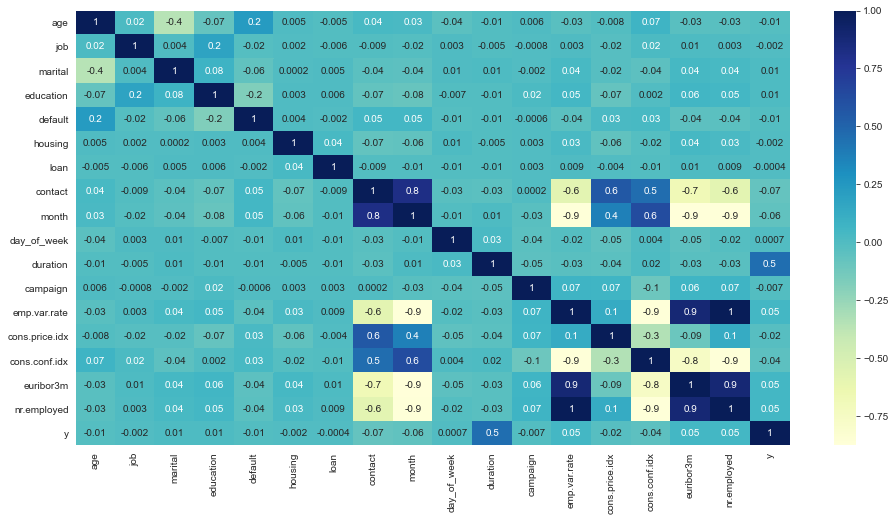

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(foo.corr(),annot = True,cmap="YlGnBu",fmt='.1g')

In [20]:
foo = foo.drop(['emp.var.rate','euribor3m'],axis=1)

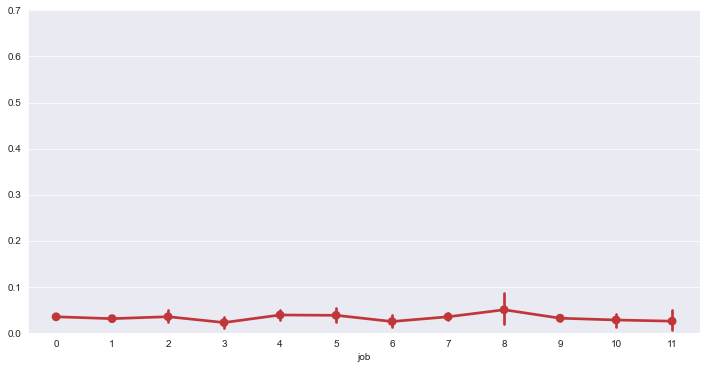

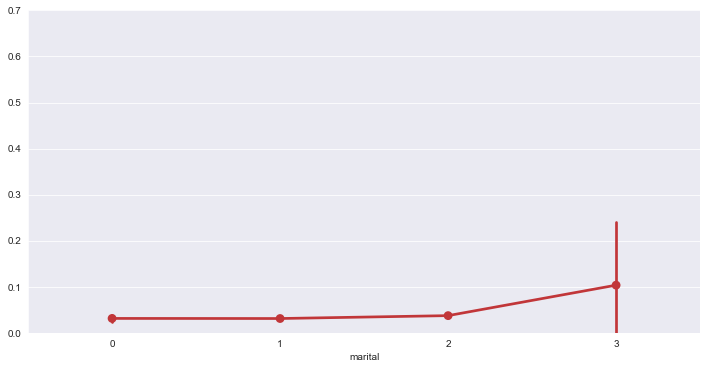

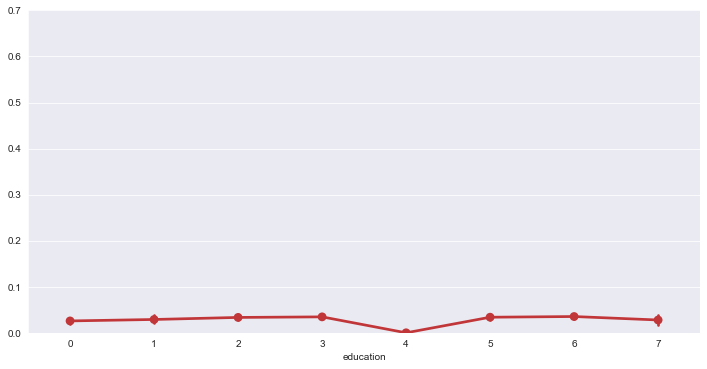

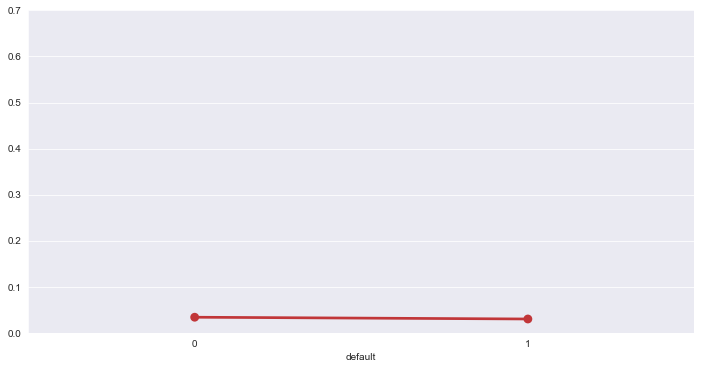

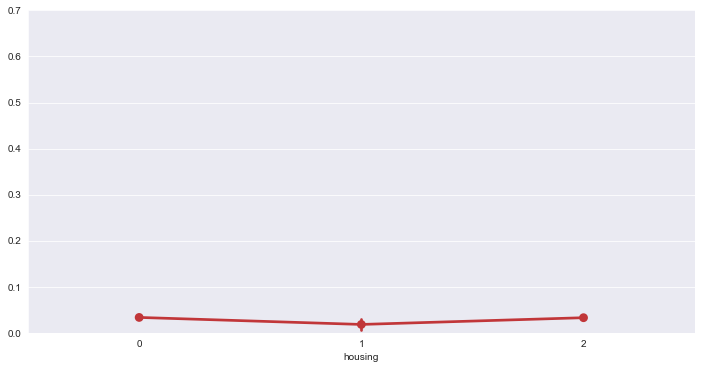

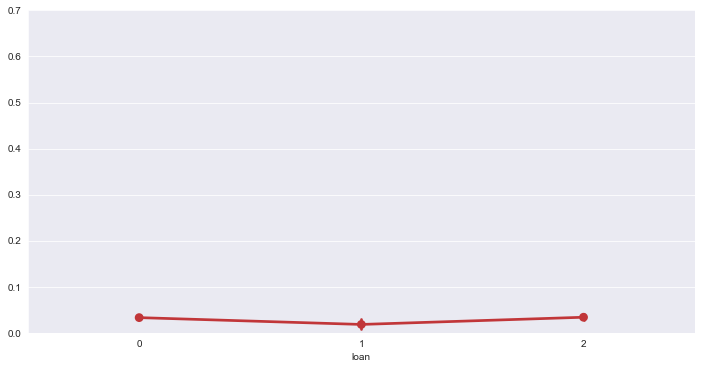

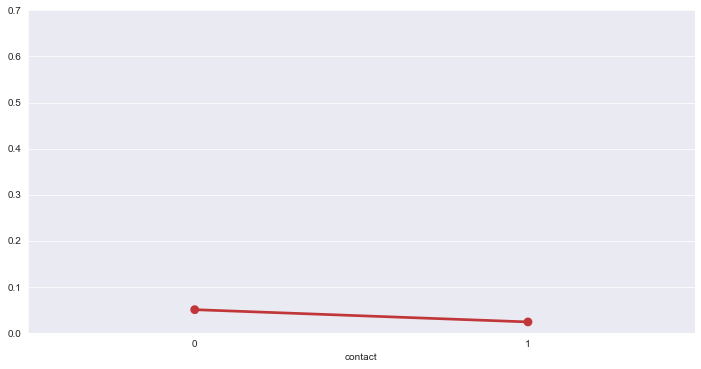

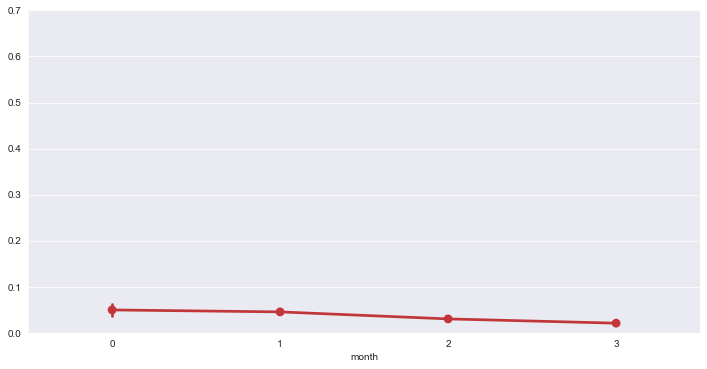

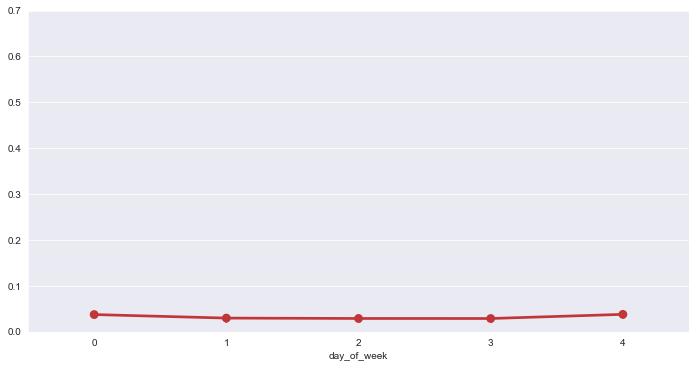

In [21]:
YY = le.fit_transform(foo.y)
for col in ["job","marital","education","default","housing","loan","contact","month","day_of_week"]:
    sns.catplot(x=col, y=YY, data=foo, kind='point', aspect=2, )
    plt.ylim(0, 0.7)

In [22]:
X = foo.drop('y', axis=1)
y = foo.y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 100)

In [23]:
knn=KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [24]:
knn.score(X_test,y_test)

0.9678959936322632

In [25]:
model1 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10))
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [26]:
model1.score(X_test, y_test)

0.9718758291323959

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9700185725656673

In [29]:
model2 = make_pipeline(StandardScaler(),PCA(n_components=.95), LogisticRegression())
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [30]:
model2.score(X_test, y_test)

0.9705492172990183